In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
iris, type(iris)

({'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ==========

In [3]:
import pandas as pd

In [4]:
df_iris = pd.DataFrame(iris['data'])
df_iris.info(), type(df_iris)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


(None, pandas.core.frame.DataFrame)

# DB에 넣기

In [5]:
import sqlite3

In [6]:
connect = sqlite3.connect('./db.sqlite3')

In [7]:
df_iris.to_sql('iris_resource', connect, if_exists='append', index=False)

In [8]:
df_load = pd.read_sql_query('select * from iris_resource', connect)
df_load.head(4)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


In [9]:
# 이제 판다스에서 넘파이만 빼내야 한다. (판다스에서 index와 columns를 빼고 데이터만 가져온다)

In [10]:
x_data = df_load.to_numpy()
x_data.shape                     # 컬럼이 4개라는 것을 알 수 있다. 

(150, 4)

In [11]:
import numpy as np

In [12]:
y_data = iris.target
y_data, np.unique(y_data)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([0, 1, 2]))

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data)

In [15]:
type(y_data)

numpy.ndarray

# 교육단계

In [16]:
import tensorflow as tf

In [17]:
model = tf.keras.Sequential()

In [18]:
model.add(tf.keras.Input(shape=4,))  # input layer

model.add(tf.keras.layers.Dense(64, activation='relu'))  # hidden layer
model.add(tf.keras.layers.Dense(24, activation='relu'))  # hidden layer

model.add(tf.keras.layers.Dense(3, activation='softmax'))  # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc']) # gadget    연속형일 때 mae


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 75        
Total params: 1,955
Trainable params: 1,955
Non-trainable params: 0
_________________________________________________________________


In [20]:
#  model.fit(x_data, y_data, epochs=100, validation_split=0.3)  # 학습   한쪽으로 쏠리는 것을 방지하기 위해 validation_split을 쓴다. 
model.fit(x_train, y_train, epochs=50, validation_data=(x_val,y_val))  # 학습   한쪽으로 쏠리는 것을 방지하기 위해 validation_split을 쓴다. 

Epoch 1/50
4/4 [==============================] - 1s 151ms/step - loss: 1.2285 - acc: 0.3482 - val_loss: 1.1809 - val_acc: 0.2895
Epoch 2/50
4/4 [==============================] - 0s 17ms/step - loss: 1.1022 - acc: 0.3482 - val_loss: 1.0575 - val_acc: 0.2895
Epoch 3/50
4/4 [==============================] - 0s 15ms/step - loss: 1.0163 - acc: 0.3482 - val_loss: 0.9665 - val_acc: 0.2632
Epoch 4/50
4/4 [==============================] - 0s 11ms/step - loss: 0.9449 - acc: 0.3482 - val_loss: 0.9052 - val_acc: 0.3684
Epoch 5/50
4/4 [==============================] - 0s 8ms/step - loss: 0.8987 - acc: 0.4286 - val_loss: 0.8505 - val_acc: 0.6842
Epoch 6/50
4/4 [==============================] - 0s 8ms/step - loss: 0.8469 - acc: 0.6250 - val_loss: 0.8067 - val_acc: 0.6842
Epoch 7/50
4/4 [==============================] - 0s 9ms/step - loss: 0.8048 - acc: 0.6161 - val_loss: 0.7700 - val_acc: 0.6579
Epoch 8/50
4/4 [==============================] - 0s 9ms/step - loss: 0.7645 - acc: 0.6518 - val_lo

# evaluation : 학습한 데이터와 검증데이터는 달라야 한다. 

In [21]:
# model.evaluate(x_data, y_data)   #  loss: 0.4340 - acc: 0.6800

In [22]:
model.evaluate(x_data, y_data) 

5/5 [==============================] - 0s 2ms/step - loss: 0.2694 - acc: 0.9733


[0.2693519592285156, 0.9733333587646484]

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
y_pred = model.predict(x_data)
y_pred.shape, y_pred[4]

((150, 3), array([9.8040545e-01, 1.8854981e-02, 7.3958031e-04], dtype=float32))

In [25]:
import numpy as np

In [26]:
y_pred_argmax = np.argmax(y_pred, axis=1)
y_pred_argmax.shape, y_pred_argmax[4]

((150,), 0)

In [27]:
y_data.shape, y_data[4]

((150,), 0)

In [28]:
print(classification_report(y_data, y_pred_argmax))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.92      0.96        50
           2       0.93      1.00      0.96        50

    accuracy                           0.97       150
   macro avg       0.98      0.97      0.97       150
weighted avg       0.98      0.97      0.97       150



In [38]:
y_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [30]:
confusion_matrix(y_data, y_pred_argmax)

array([[50,  0,  0],
       [ 0, 46,  4],
       [ 0,  0, 50]])

In [31]:
import seaborn as sns

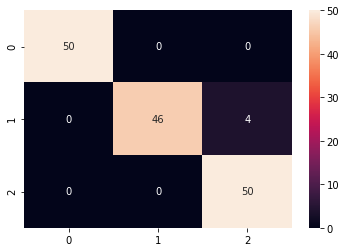

In [32]:
sns.heatmap(confusion_matrix(y_data, y_pred_argmax), annot=True)

# service

In [33]:
x_data[25], y_data[25]

(array([5. , 3. , 1.6, 0.2]), 0)

In [34]:
pred = model.predict([[5. , 3. , 1.6, 0.2]])
pred

array([[0.96444595, 0.03412138, 0.00143265]], dtype=float32)

In [35]:
import numpy as np

In [36]:
np.argmax(pred)

0